In [49]:
import numpy as np
import pandas as pd
import ydata_profiling as yp
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [39]:
df_economy = pd.read_csv('../Data/economy.csv')
df_business = pd.read_csv('../Data/business.csv')

In [40]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [41]:
df_business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [42]:
df_business.shape

(93487, 11)

In [43]:
df_economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [44]:
df_economy.shape

(206774, 11)

In [45]:
df_economy['Class'] = 'Economy'
df_business['Class'] = 'Business'

In [46]:
df = pd.concat([df_economy, df_business], axis = 0)

In [47]:
yp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
my_report = sv.analyze(df)
my_report.show_html('FinalReport.html')

C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Pinil\anaconda3\lib\site-packages\sweetviz\series_ana

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy


In [11]:
df.shape

(300261, 12)

In [19]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print(f"All features : {all_col}")
print(f"\nNumeric features : {num_col}")
print(f"\nCategorical features : {cat_col}")

All features : ['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price', 'Class']

Numeric features : ['num_code']

Categorical features : ['from', 'date', 'to', 'dep_time', 'time_taken', 'Class', 'arr_time', 'airline', 'ch_code', 'stop', 'price']


In [12]:
def pie_plot(x, title):
    print(df[x].value_counts())

    sns.set()
    plt.figure(figsize = (10, 10))
    plt.pie(x = df[x].value_counts(normalize = True), autopct = '%1.1f%%')
    plt.legend(labels = df[x].value_counts().index, loc = 'upper left', title = title)
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title)
    plt.show()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64


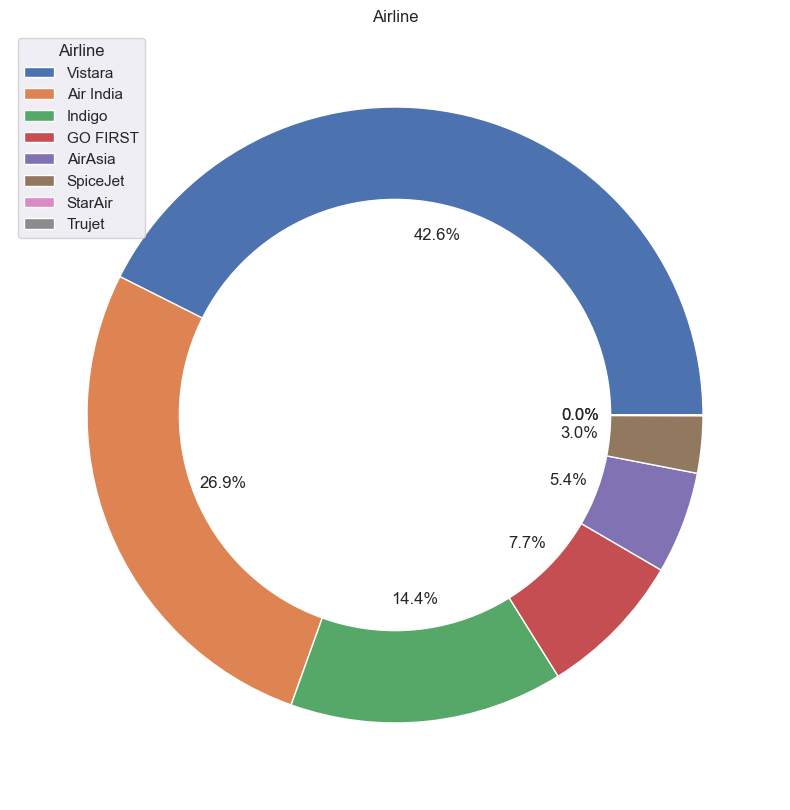

In [13]:
pie_plot(x = 'airline', title = 'Airline')

In [14]:
# Dropping some rows in Airline, due to less number of available data
df = df[df['airline'] != 'StarAir']
df = df[df['airline'] != 'Trujet']

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


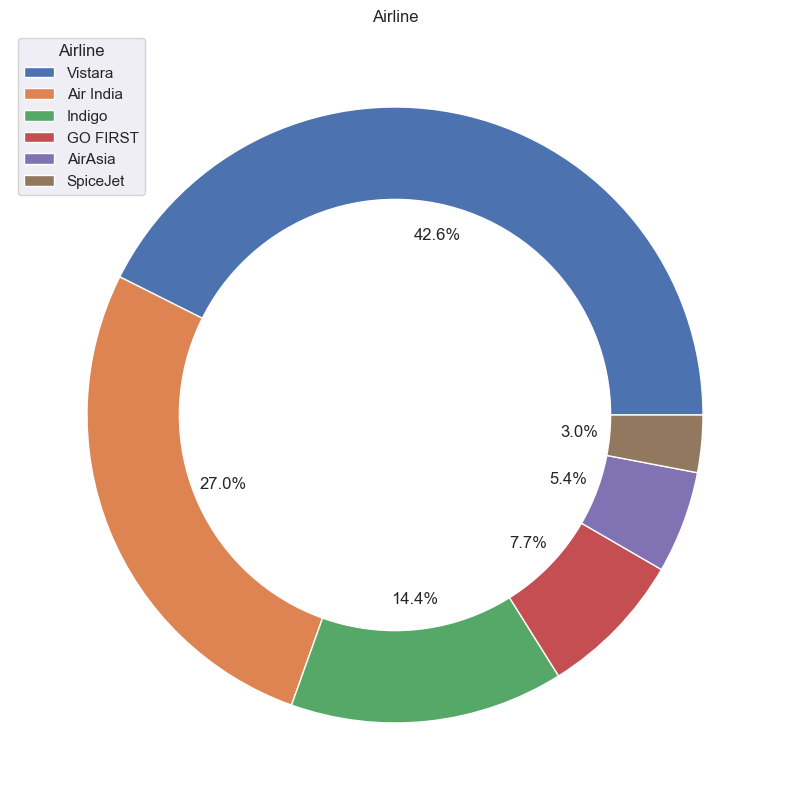

In [15]:
pie_plot(x = 'airline', title = 'Airline')

In [21]:
df['ch_code'].value_counts()

UK    127859
AI     80894
6E     43120
G8     23177
I5     16098
SG      9011
Name: ch_code, dtype: int64

In [23]:
df['Flight code'] = df['ch_code'] + "-" + df['num_code'].astype('str')

In [24]:
df['Flight code'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: Flight code, Length: 1561, dtype: int64

In [32]:
df['dep_time'].str.split(":", expand = True)[0].unique()

array(['18', '06', '04', '10', '08', '11', '09', '14', '15', '07', '12',
       '19', '05', '17', '13', '16', '21', '20', '22', '23', '02', '00',
       '01', '03'], dtype=object)

Delhi        61345
Mumbai       60896
Bangalore    52064
Kolkata      46347
Hyderabad    40807
Chennai      38700
Name: from, dtype: int64


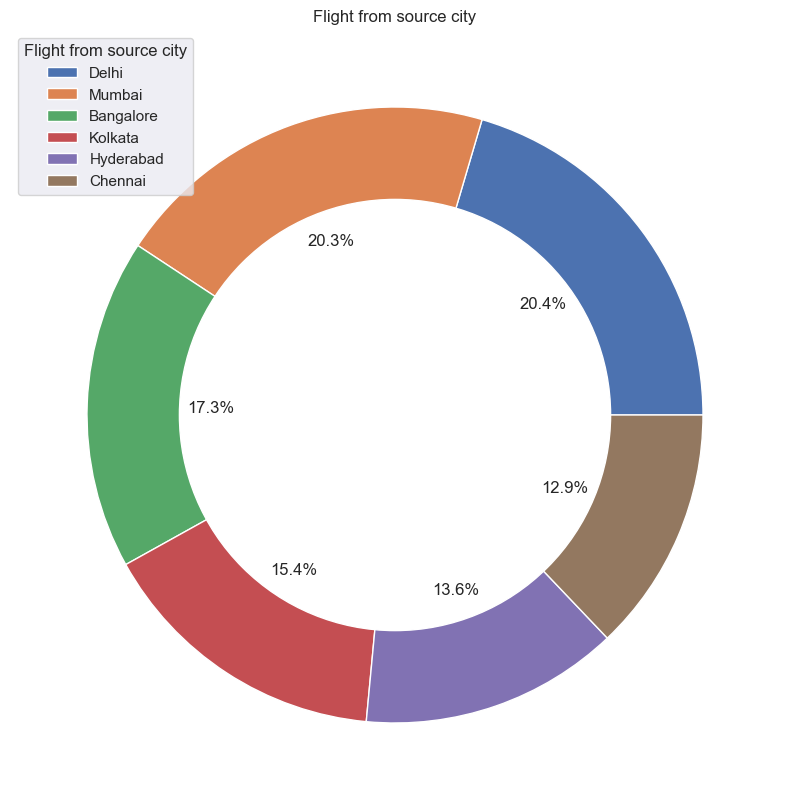

In [16]:
pie_plot(x = 'from', title = 'Flight from source city')

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


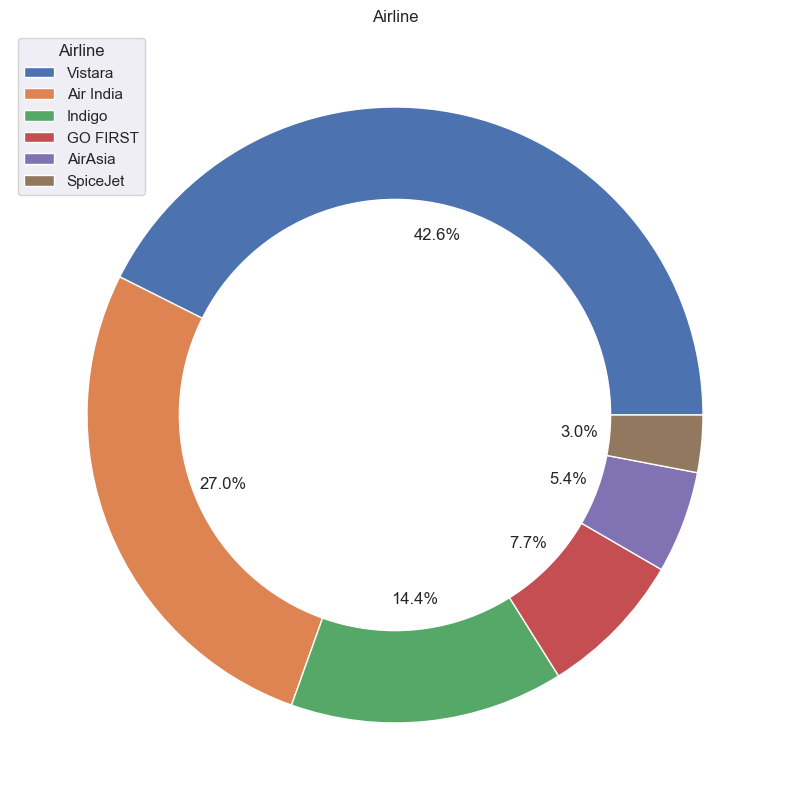

In [17]:
pie_plot(x = 'airline', title = 'Airline')